# Brain Tumor Classifier

## Author

__Coded and written by Jorge Hristovsky__.
    Before using the code in this project please contact me and let me know.

- Feel free to reach out to me at:
    - LinkedIn - https://www.linkedin.com/in/jorge-hristovsky-7a1747211/
    - Email - jchyo@iscte-iul.pt

## Introduction

Although a very sensitive and complex topic, brain tumors are the leading cause of cancer death in children under the age of 20, surpassing even leukemia, a well known deadly cancer. Despite their painful existence, there are still ways we can fight brain tumors and that includes proper diagnosis.

According to the World Health Organization (WHO), proper brain tumor diagnosis involves a lot of factors like: tumor location, classification of the tumor on the basis of malignancy, grade and type. Since a complete and accurate brain tumor diagnosis is a complicated task for a machine and should only be done by medical professionals, with the use of a decent CNN (Convolutional Neural Network) we can still make really accurate guesses regarding the classification of the tumor and it's location with a simple and nitid MRI image.     

### Tactics and Objetive

The first question that might pop into your mind is why a CNN? Isn't a simple MLP (Multi-Layer Perceptron) enough? Well unfortunately, it's a bit more complicated than that.

Altought you are correct to assume that a MLP would be a good ideia, there is a reason that CNN's are the go to when it comes to image data processing (especially with "difficult" images) and that is it's __spacial relationship__ in image classification. Since the tumor location is an important factor in the diagnosis and it can be anywhere on the brain and have different sizes a MLP could recognize it as a completely different image and tumor category, making wrong predictions. But that doesn't mean you are completely wrong, we are still going to have the usual hidden dense neuron layer just like a MLP would have.

We will be making several models and analyzing each model's accuracy and it's computer usage, making several changes to improve both. We will be also taking account the learning curve to check for data overfitting and excess/lack of data.

### Necessary Imports

Necessary imports for this project and a quick overview.

In [3]:
#For the CNN

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#Plotting and pathing

import os
import matplotlib.pyplot as plt

### Dataset Used

For this project we used this dataset -> https://www.kaggle.com/masoudnickparvar/brain-tumor-mri-dataset.

It has a folder for the training and the testing components of this project. In the aforementioned folders there are the respective types of brain tumors which contain hundreds of MRI scans. This dataset is very well organized and we shouldn't run into any file displacement problem.

### MRI Scans Image Analysis

Before we start implementing the CNN we should first analyse the dataset used, __especially when working with  images__.


- We need to be checking for:

    - Image sharpness/nitidity;
    
    - Extra and useless "materials" on the image;
    
    - Size (not to confuse with file size);

#### Image Sharpness and Extra Materials

Altought in a important setting every image should be verified and checked for problems with nitidity __by hand__, in this small project the dataset given was alredy verified by trusted sources, therefore no checks were made. Same applies to the extra "materials".

#### Size

Extremely important element of this project because of the tumor location component in the final diagnosis. If the given images have different sizes and __especially if they are all scaled differently__ the CNN may be rendered useless (assuming the data isn't handled and manipulated in the coding of the CNN). Let's visualize the scans and their respective sizes:

Image Size (Height, Width, Color Channels):  (512, 512, 3)


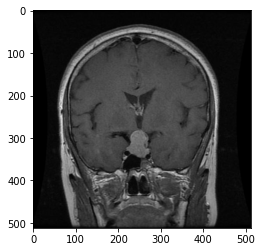

In [3]:
#Dataset path
try:
    dataSetTumor = (r".../dataSetTumor/Training/")
except:
    print("Dataset not found!")
    

#Categories and possible outputs
tumorCategories = ['glioma', 'meningioma', 'no_tumor', 'pituitary']

#Folder iteration
for i in tumorCategories:
    folderPath = os.path.join(dataSetTumor, i)
    #Image iteration
    for img in os.listdir(folderPath + '_tumor'):
        imgArray = plt.imread(os.path.join(folderPath + "_tumor/",img))
#Check size
plt.imshow(imgArray)

print("Image Size (Height, Width, Color Channels): ", imgArray.shape)


We can quickly observe that the image size is 512x512 __px__, and since the rest of the pictures are the same size (assured by the dataset author) we can assume that every image is exactly 512x512 __px__.  

__Quick Note__: Your path and folder files may differ so alter the code/name files at your own discretion. 

## Modelling the CNN

Before we model the neural network I'll assume that you understand the basics of modelling neural networks and the __Keras API__.

__Let's model a few different CNN's with different optimizers, input shapes and layers__.

### Model A

Let's make the first model as simple as possible:

- 3x3 kernel on all convolutional layers and same number of filters on each layer;
- Three convolutional layers and 3 dense layers;
- Max pooling on all tree convolutional layers with pool size 2x2 and strides=2 (essencially reducing the image in half);
- Activation __Relu__ on every layer except the final one where we will be using __Softmax__, so we can get the probabilities of each tumor category;
- We will have a dropout layer after each dense layer (we could also do it after each pooling layer but we won't to save computational power);
- Since we have dense layers together with convolutional layers (especially because of the max pooling layer) we will need to translate the data from one to another therefore we will be also using a flattening Layer;
- We will be using __Adam__ as our optimizer;
- As a loss function there isn't much choice so we will be going with the categorical crossentropy function, same for the metrics.
- And to conclude we will have a batch normalization layer before our linear layers and after each convolutional layer.

In [2]:
#Model A
modelA = Sequential()

#Convolutional layer 1 of Model A
modelA.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(64, 64, 1)))
modelA.add(BatchNormalization())
modelA.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2 of Model A
modelA.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
modelA.add(BatchNormalization())
modelA.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 3 of Model A
modelA.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
modelA.add(BatchNormalization())
modelA.add(MaxPooling2D(pool_size=(2,2)))

#Converting the output of the convolutional layer to the input of the dense layer
modelA.add(Flatten())

#Dense layer 1 of Model A
modelA.add(Dense(units=128, activation='relu'))
modelA.add(Dropout(0.2))

#Dense layer 2 of Model A
modelA.add(Dense(units=128, activation='relu'))
modelA.add(Dropout(0.2))

#Output layer of Model A
modelA.add(Dense(units=4, activation='softmax'))

#Compiling + Summary
#For now we will be using Adam's default values
modelA.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5), loss='categorical_crossentropy', metrics = 'categorical_accuracy')
modelA.summary()

#Preparing the data

trainData = tf.keras.preprocessing.image_dataset_from_directory('.../dataSetTumor/Training',
                                            image_size=(64,64),
                                            batch_size=32,
                                            label_mode= "categorical",
                                            color_mode='grayscale'
                                            )

testData = tf.keras.preprocessing.image_dataset_from_directory('.../dataSetTumor/Testing',
                                            image_size=(64,64),
                                            batch_size=32,
                                            label_mode= "categorical",
                                            color_mode='grayscale'
                                            )


#Callbacks

modelA_ES = EarlyStopping(monitor = 'loss', restore_best_weights = True, patience = 10, verbose = 1)
modelA_RLR = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 5, verbose = 1)
#modelA_MCP = ModelCheckpoint(filepath = '.../BestWeights', monitor = 'val_categorical_accuracy', save_best_only = True, save_freq = 100)

#Trainning the model

modelA_fited = modelA.fit(trainData,
                          #steps_per_epoch=5712//32,
                          epochs=100,
                          validation_data=testData,
                          shuffle=True,
                          #validation_steps= 1311//32,
                          callbacks=[modelA_ES,
                                     modelA_RLR,
                                     #modelA_MCP
                                     ])


plt.plot(modelA_fited.history["loss"],c = "blue")
plt.plot(modelA_fited.history["val_loss"],c = "orange")
plt.legend(["Train", "Test"])
plt.title("Checking for overfitting...")
plt.show()

modelA.evaluate(testData)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        3

[0.12198580056428909, 0.9778794646263123]

#### Results of Model A

Taking a quick peek at the output of the evaluation function we can find out that our model has a 97.79% accuracy. Strictly speaking it's a good model, we can very fast point out that after a few epochs the model stabilizes and shows a decent learning curve.

But we are still not satisfied with the results, let's try to improve it even further like our life depended on it.

### Model B

In [ ]:
#For the CNN

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#Plotting and pathing

import os
import matplotlib.pyplot as plt


#Model B
modelB = Sequential()

#Convolutional layer 1 of Model B
modelB.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(64, 64, 1)))
modelB.add(BatchNormalization())
modelB.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2 of Model B
modelB.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
modelB.add(BatchNormalization())
modelB.add(MaxPooling2D(pool_size=(2,2)))


#Converting the output of the convolutional layer to the input of the dense layer
modelB.add(Flatten())

#Dense layer 1 of Model B
modelB.add(Dense(units=1024, activation='relu'))
modelB.add(Dropout(0.2))

#Dense layer 2 of Model B
modelB.add(Dense(units=256, activation='relu'))
modelB.add(Dropout(0.2))


#Output layer of Model B
modelB.add(Dense(units=4, activation='softmax'))

#Compiling + Summary
#For now we will be using Adam's default values
modelB.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5), loss='categorical_crossentropy', metrics = 'categorical_accuracy')
modelB.summary()

trainData = tf.keras.preprocessing.image_dataset_from_directory('C:/Users/Jorge/Desktop/dataSetTumor/Training',
                                            image_size=(64,64),
                                            batch_size=32,
                                            label_mode= "categorical",
                                            color_mode='grayscale'
                                            )

testData = tf.keras.preprocessing.image_dataset_from_directory('C:/Users/Jorge/Desktop/dataSetTumor/Testing',
                                            image_size=(64,64),
                                            batch_size=32,
                                            label_mode= "categorical",
                                            color_mode='grayscale'
                                            )

#Callbacks

modelB_ES = EarlyStopping(monitor = 'loss', restore_best_weights = True, patience = 10, verbose = 1)
modelB_RLR = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 5, verbose = 1)
#modelB_MCP = ModelCheckpoint(filepath = '.../BestWeights', monitor = 'val_categorical_accuracy', save_best_only = True, save_freq = 100)

#Trainning the model

modelB_fited = modelB.fit(trainData,
                          #steps_per_epoch=5712//32,
                          epochs=100,
                          validation_data=testData,
                          shuffle=True,
                          #validation_steps= 1311//32,
                          callbacks=[modelB_ES,
                                     modelB_RLR,
                                     #modelB_MCP
                                     ])


plt.plot(modelB_fited.history["loss"],c = "blue")
plt.plot(modelB_fited.history["val_loss"],c = "orange")
plt.legend(["Train", "Test"])
plt.title("Checking for overfitting...")
plt.show()

modelB.evaluate(testData)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0

179/179 [==============================] - 41s 227ms/step - loss: 2.7043e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1265 - val_categorical_accuracy: 0.9771
Epoch 37/100
179/179 [==============================] - 41s 229ms/step - loss: 4.9178e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1251 - val_categorical_accuracy: 0.9771
Epoch 38/100
179/179 [==============================] - 41s 231ms/step - loss: 8.5225e-04 - categorical_accuracy: 0.9998 - val_loss: 0.1249 - val_categorical_accuracy: 0.9771
Epoch 39/100
179/179 [==============================] - 41s 228ms/step - loss: 0.0021 - categorical_accuracy: 0.9995 - val_loss: 0.1245 - val_categorical_accuracy: 0.9771
Epoch 40/100
179/179 [==============================] - 41s 229ms/step - loss: 1.9704e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1235 - val_categorical_accuracy: 0.9779

Epoch 00040: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Epoch 41/100
179/179 [==============================] - 42s 

#### Results of Model C

Unfortunately that was a big letdown but let's not give up yet there are still many changes we can make that are certain to work. 

### Model C

Let's keep the model B "improvements" but change the kernel size from 3x3 to 7x7.

In [ ]:
#Model C
modelC = Sequential()

#Convolutional layer 1 of Model C
modelC.add(Conv2D(filters=64, kernel_size=(7,7), activation='relu', input_shape=(64, 64, 1)))
modelC.add(BatchNormalization())
modelC.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2 of Model C
modelC.add(Conv2D(filters=128, kernel_size=(7,7), activation='relu'))
modelC.add(BatchNormalization())
modelC.add(MaxPooling2D(pool_size=(2,2)))


#Converting the output of the convolutional layer to the input of the dense layer
modelC.add(Flatten())

#Dense layer 1 of Model C
modelC.add(Dense(units=1024, activation='relu'))
modelC.add(Dropout(0.2))

#Dense layer 2 of Model C
modelC.add(Dense(units=512, activation='relu'))
modelC.add(Dropout(0.2))


#Output layer of Model C
modelC.add(Dense(units=4, activation='softmax'))

#Compiling + Summary
#For now we will be using Adam's default values
modelC.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5), loss='categorical_crossentropy', metrics = 'categorical_accuracy')
modelC.summary()

trainData = tf.keras.preprocessing.image_dataset_from_directory('.../dataSetTumor/Training',
                                            image_size=(64,64),
                                            batch_size=32,
                                            label_mode= "categorical",
                                            color_mode='grayscale'
                                            )

testData = tf.keras.preprocessing.image_dataset_from_directory('.../dataSetTumor/Testing',
                                            image_size=(64,64),
                                            batch_size=32,
                                            label_mode= "categorical",
                                            color_mode='grayscale'
                                            )

#Callbacks

modelC_ES = EarlyStopping(monitor = 'loss', restore_best_weights = True, patience = 10, verbose = 1)
modelC_RLR = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 5, verbose = 1)
#modelC_MCP = ModelCheckpoint(filepath = '.../BestWeights', monitor = 'val_categorical_accuracy', save_best_only = True, save_freq = 100)

#Trainning the model

modelC_fited = modelC.fit(trainData,
                          #steps_per_epoch=5712//32,
                          epochs=100,
                          validation_data=testData,
                          shuffle=True,
                          #validation_steps= 1311//32,
                          callbacks=[modelB_ES,
                                     modelB_RLR,
                                     #modelB_MCP
                                     ])


plt.plot(modelC_fited.history["loss"],c = "blue")
plt.plot(modelC_fited.history["val_loss"],c = "orange")
plt.legend(["Train", "Test"])
plt.title("Checking for overfitting...")
plt.show()

modelC.evaluate(testData)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 58, 64)        3200      
_________________________________________________________________
batch_normalization (BatchNo (None, 58, 58, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 128)       401536    
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0

#### Results of Model C

This model satisfied me a lot, for a extra 30 secons per epoch (compared to A) we managed to avoid underfitting and overfitting with a nice learning curve. We also managed to reach 98% accuracy. This model can definitely be improved on to reach a 98.5% accuracy. Looking at the graph we can clearly see that if we start with a small number of filters and then increase them the curve is much smoother in early epochs. Same thing for later epochs where a bigger number of dense layers and decreasing them leads to a much better learning curve (the closer the test and train are the better).

## Conclusion

Throughout the coding part of this project, we managed to observe the consequences of changing certain parameters in the CNN, specifically the number of filters/kernel size and their respective time addition/computer usage. Along each model we can quickly point out small increments in the accuracy which are results of the aforementioned changes. We also observed  how to handle skewed data or the lack of it by the use of data augmentation and manipulation. 

On another note, while doing this project I also learned new medical terms, improved my writing skills, learned how machine learning could help people in need especially when working with image classification, and gained a new deep feeling of respect for people battling and suffering from this disease every day. 

At last, I would like to point out that, altought we could defininately have created more models to improve the accuracy by tiny amounts, a 98% sucess rate CNN should be taken seriously even in a medical enviroment. 